<a href="https://colab.research.google.com/github/surendran2566/Netflix-Data-Cleaning-Analysis-and-Visualization/blob/main/Netflix_Data_(Cleaning%2C_Analysis_and_Visualization).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
                      ###### Netflix Data: Cleaning, Analysis and Visualization

# Step 1: Importing Required Libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
import warnings
warnings.filterwarnings('ignore')

# Configure plotting style
sns.set_style('ticks')
palette = sns.color_palette("ch:s=.25,rot=-.25")


In [ ]:
# Step 2: Uploading the dataset

from google.colab import files
uploaded = files.upload()

import pandas as pd

df = pd.read_csv('netflix1.csv')  # Replace with your uploaded file name

# Check what columns are in the dataset
print("Available columns:\n", df.columns.tolist())

# Display the first few rows
df.head()

Saving netflix1.csv to netflix1 (2).csv
Available columns:
 ['show_id', 'type', 'title', 'director', 'country', 'date_added', 'release_year', 'rating', 'duration', 'listed_in']


,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"


In [ ]:
# Step 3: Feature Engineering - Genre Simplification

import pandas as pd

from google.colab import files
uploaded = files.upload()

import pandas as pd

df = pd.read_csv('netflix1.csv')

# Define helper function
def extract_secondary(text):
    parts = text.split(',')
    return parts[1].strip() if len(parts) > 1 else parts[0].strip()

# Remove rows with null 'listed_in'
df = df[df['listed_in'].notnull()]

# Create main and secondary genre columns
df['main_genre'] = df['listed_in'].apply(lambda x: x.split(',')[0].strip())
df['secondary_genre'] = df['listed_in'].apply(extract_secondary)

# Genre mapping dictionary
genre_map = {
    'Documentaries': 'Documentaries',
    'British TV Shows': 'International',
    'International TV Shows': 'International',
    'Crime TV Shows': 'Crime',
    'Docuseries': 'Documentaries',
    'TV Dramas': 'Dramas',
    'Children & Family Movies': 'Children & Family',
    'Dramas': 'Dramas',
    'Comedies': 'Comedies',
    'TV Comedies': 'Comedies',
    'Thrillers': 'Thrillers',
    'TV Thrillers': 'Thrillers',
    'Horror Movies': 'Horror',
    "Kids' TV": "Kids",
    'Action & Adventure': 'Action',
    'Reality TV': 'Reality',
    'Anime Series': 'Anime',
    'International Movies': 'International',
    'Sci-Fi & Fantasy': 'Sci-Fi',
    'Classic Movies': 'Classic',
    'TV Shows': 'TV Shows',
    'Stand-Up Comedy': 'Stand-Up',
    'TV Action & Adventure': 'Action',
    'Movies': 'Movies',
    'Korean TV Shows': 'International',
    'Stand-Up Comedy & Talk Shows': 'Stand-Up',
    'Classic & Cult TV': 'Classic',
    'Anime Features': 'Anime',
    'Cult Movies': 'Cult',
    'Independent Movies': 'Independent',
    'TV Horror': 'Horror',
    'Music & Musicals': 'Music',
    'LGBTQ Movies': 'LGBTQ',
    'Sports Movies': 'Sports',
    'Spanish-Language TV Shows': 'International',
    'Romantic TV Shows': 'Romantic',
    'Romantic Movies': 'Romantic',
    'TV Sci-Fi & Fantasy': 'Sci-Fi',
    'Faith & Spirituality': 'Faith',
    'Science & Nature TV': 'Science'
}

# Map genres
df['main_genre'] = df['main_genre'].map(genre_map)
df['secondary_genre'] = df['secondary_genre'].map(genre_map)

# Replace rare genres in main_genre with secondary_genre
rare = ['LGBTQ', 'Cult', 'Sports', 'Independent']
for r in rare:
    mask = df['main_genre'] == r
    df.loc[mask, 'main_genre'] = df.loc[mask, 'secondary_genre']

Saving netflix1.csv to netflix1.csv


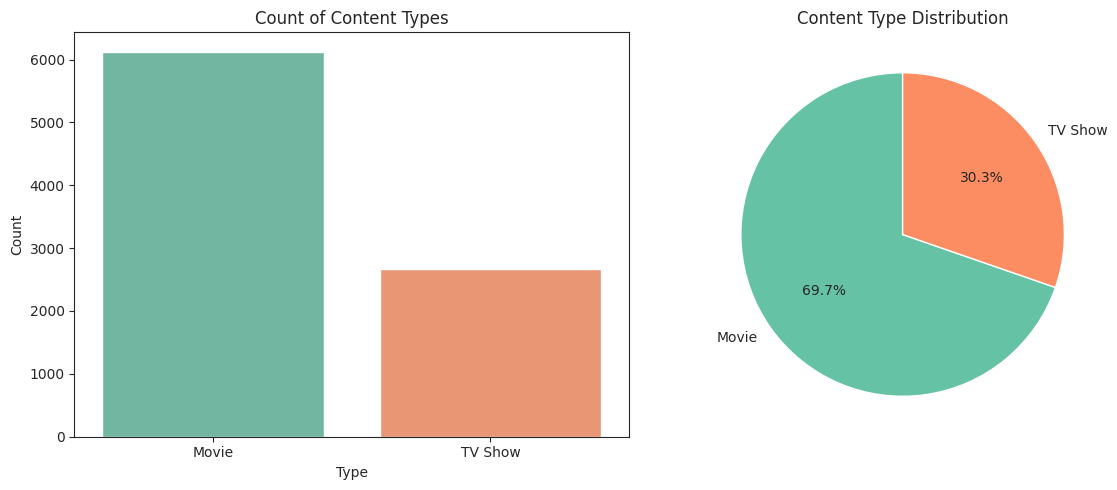

In [ ]:
                                                # Exploratory Data Analysis (EDA)

# Step 4: Content Type Distribution

freq = df['type'].value_counts()
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Bar plot
sns.countplot(data=df, x='type', palette='Set2', ax=axes[0])
axes[0].set_title('Count of Content Types')
axes[0].set_xlabel('Type')
axes[0].set_ylabel('Count')

# Pie chart
axes[1].pie(freq, labels=freq.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('Set2'))
axes[1].set_title('Content Type Distribution')

plt.tight_layout()
plt.show()

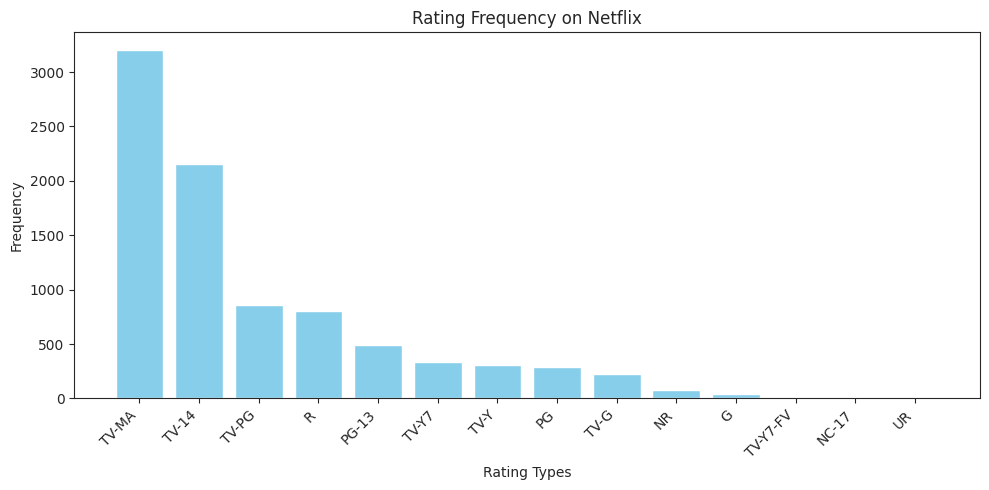

In [ ]:
                                                # Exploratory Data Analysis (EDA)

# Step 5: Ratings Distribution

rating_counts = df['rating'].value_counts().reset_index()
rating_counts.columns = ['rating', 'count']

plt.figure(figsize=(10, 5))
plt.bar(rating_counts['rating'], rating_counts['count'], color='skyblue')
plt.xticks(rotation=45, ha='right')
plt.title('Rating Frequency on Netflix')
plt.xlabel('Rating Types')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

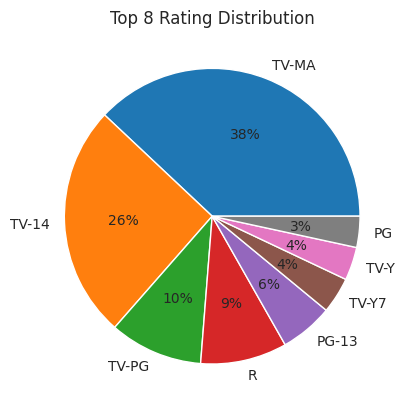

In [ ]:
                                                # Exploratory Data Analysis (EDA)

# Step 6: Pie for top 8 ratings

plt.pie(rating_counts['count'][:8], labels=rating_counts['rating'][:8], autopct='%.0f%%')
plt.title('Top 8 Rating Distribution')
plt.show()

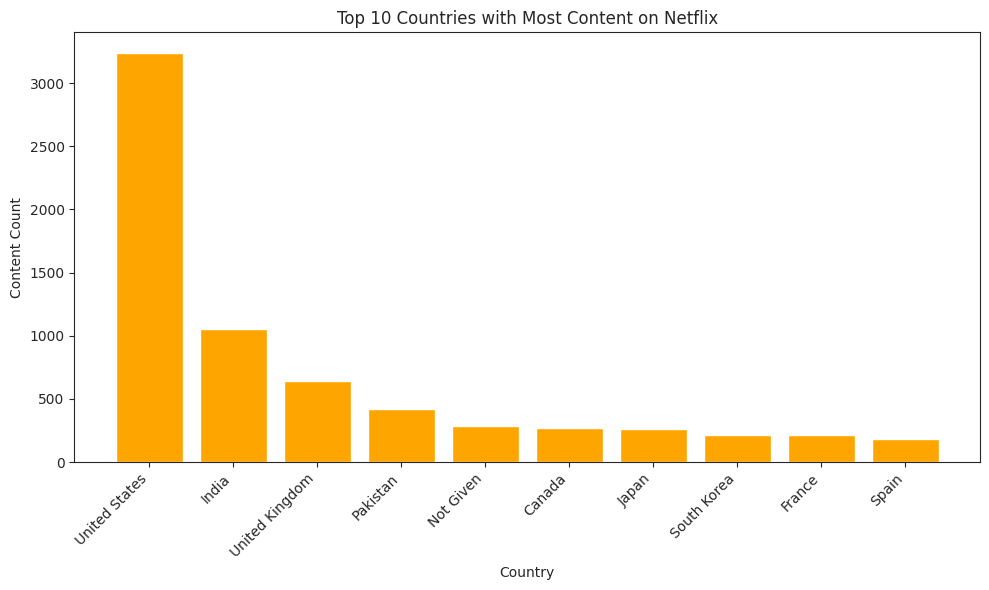

In [ ]:
                                                # Exploratory Data Analysis (EDA)

# Step 7: Top 10 Countries

top_countries = df['country'].value_counts().head(10)

plt.figure(figsize=(10, 6))
plt.bar(top_countries.index, top_countries.values, color='orange')
plt.xticks(rotation=45, ha='right')
plt.title('Top 10 Countries with Most Content on Netflix')
plt.xlabel('Country')
plt.ylabel('Content Count')
plt.tight_layout()
plt.show()

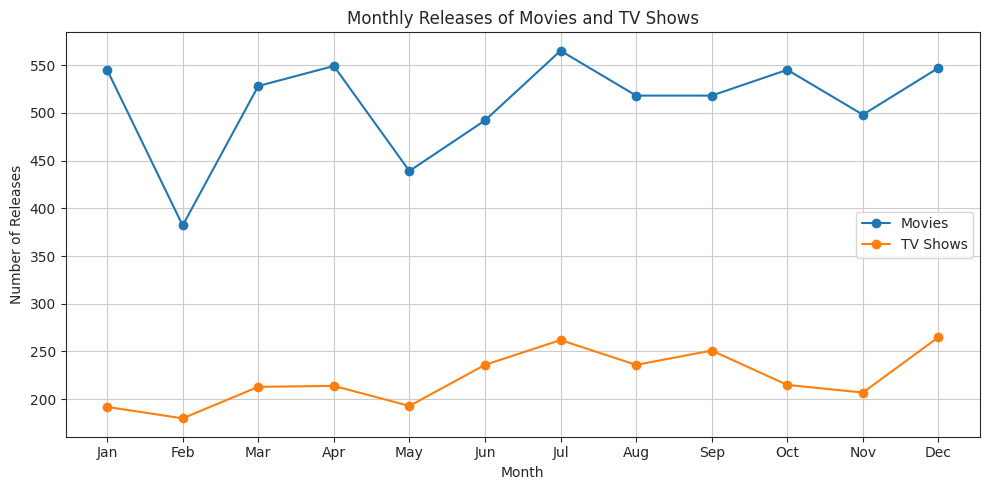

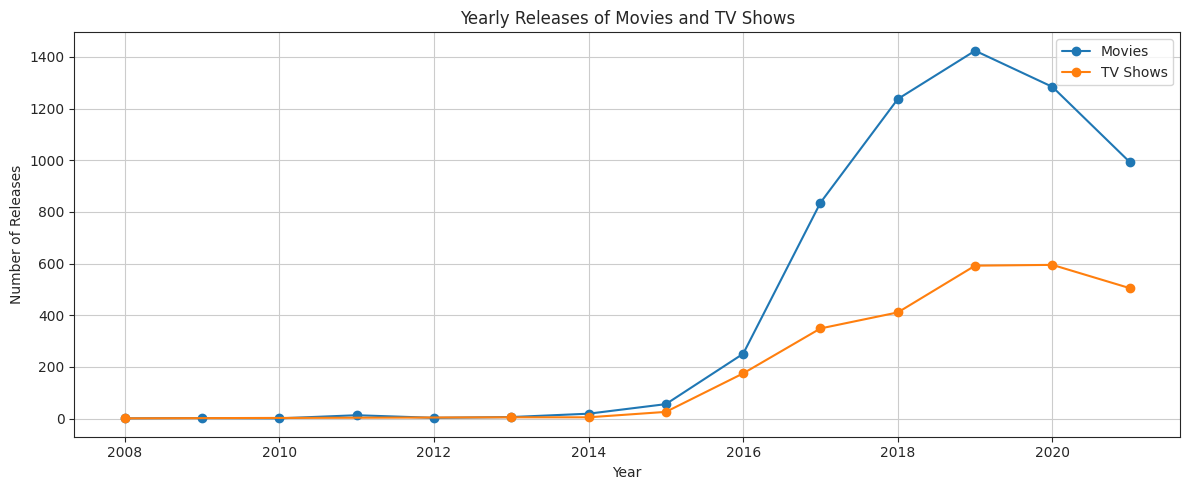

In [ ]:
                                                # Exploratory Data Analysis (EDA)

# Step 8: Monthly and Yearly Trends

# Date_added in datetime format
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')

# Drop rows with missing or invalid dates
df.dropna(subset=['date_added'], inplace=True)

# Extract year and month
df['year'] = df['date_added'].dt.year
df['month'] = df['date_added'].dt.month

# Separate into movies and TV shows
df_movie = df[df['type'] == 'Movie']
df_show = df[df['type'] == 'TV Show']

#  Monthly Release Trends
monthly_movie_release = df_movie['month'].value_counts().sort_index()
monthly_show_release = df_show['month'].value_counts().sort_index()

plt.figure(figsize=(10, 5))
plt.plot(monthly_movie_release.index, monthly_movie_release.values, label='Movies', marker='o')
plt.plot(monthly_show_release.index, monthly_show_release.values, label='TV Shows', marker='o')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
                          'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.xlabel('Month')
plt.ylabel('Number of Releases')
plt.title('Monthly Releases of Movies and TV Shows')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# Yearly Release Trends
yearly_movie_release = df_movie['year'].value_counts().sort_index()
yearly_show_release = df_show['year'].value_counts().sort_index()

plt.figure(figsize=(12, 5))
plt.plot(yearly_movie_release.index, yearly_movie_release.values, label='Movies', marker='o')
plt.plot(yearly_show_release.index, yearly_show_release.values, label='TV Shows', marker='o')
plt.xlabel('Year')
plt.ylabel('Number of Releases')
plt.title('Yearly Releases of Movies and TV Shows')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

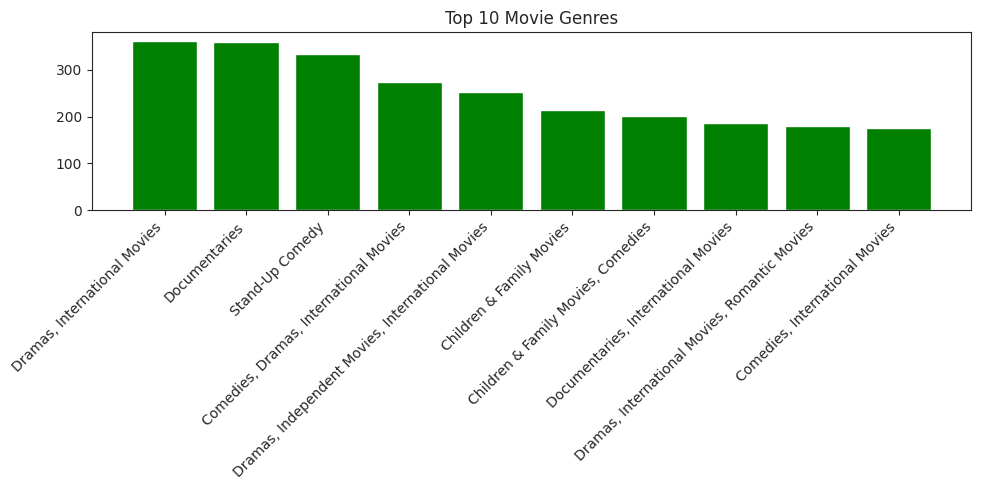

In [ ]:
                                                # Exploratory Data Analysis (EDA)

# Step 9: Top 10 Genres

# Movie Genres

top_movie_genres = df_movie['listed_in'].value_counts().head(10)
plt.figure(figsize=(10, 5))
plt.bar(top_movie_genres.index, top_movie_genres.values, color='green')
plt.xticks(rotation=45, ha='right')
plt.title('Top 10 Movie Genres')
plt.tight_layout()
plt.show()

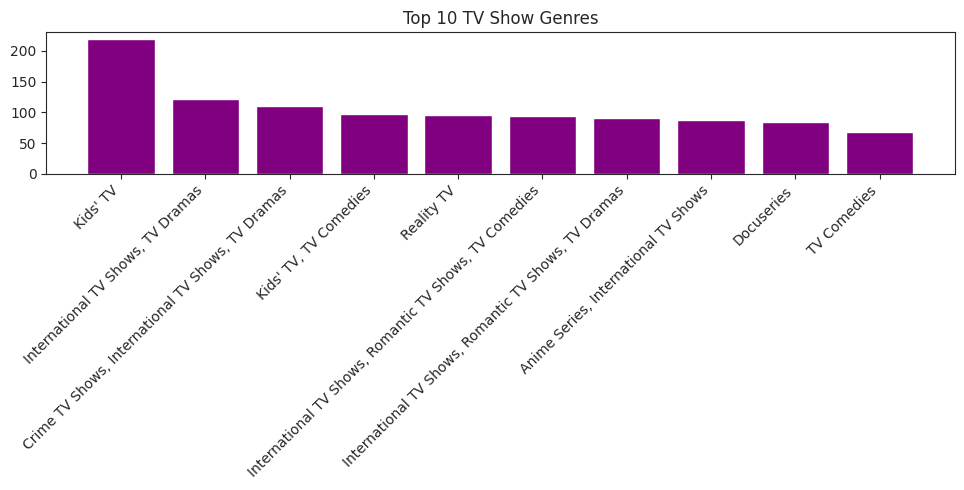

In [ ]:
                                                # Exploratory Data Analysis (EDA)

# Step 10: TV Show Genres

top_tv_genres = df_show['listed_in'].value_counts().head(10)
plt.figure(figsize=(10, 5))
plt.bar(top_tv_genres.index, top_tv_genres.values, color='purple')
plt.xticks(rotation=45, ha='right')
plt.title('Top 10 TV Show Genres')
plt.tight_layout()
plt.show()

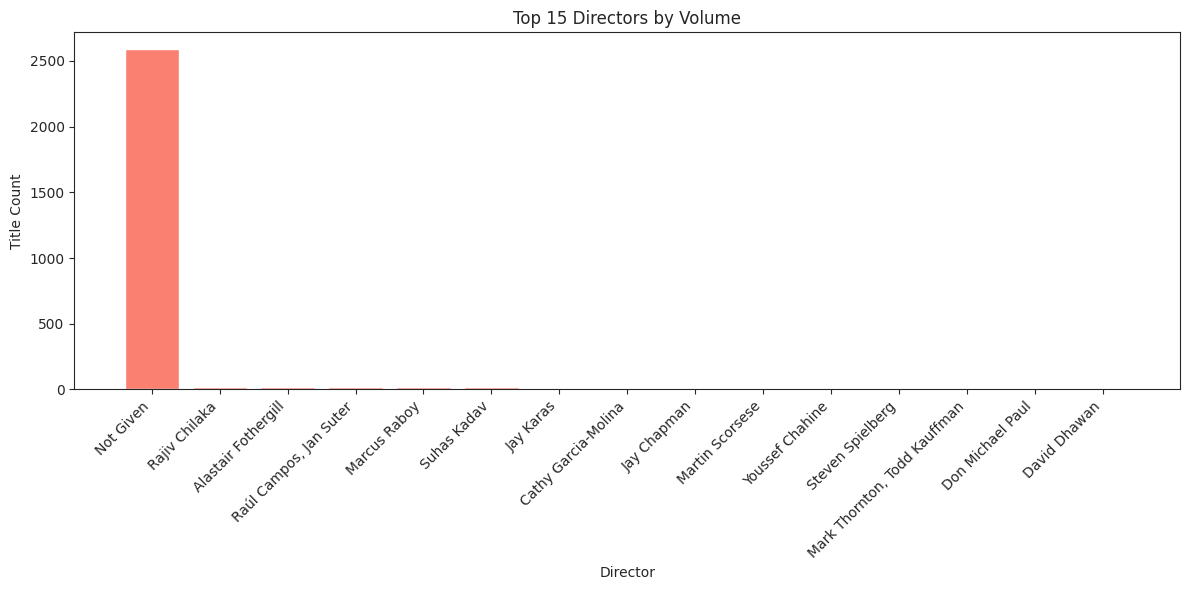

In [ ]:
                                                # Exploratory Data Analysis (EDA)

# Step 11: Top 15 Directors

top_directors = df['director'].value_counts().head(15)

plt.figure(figsize=(12, 6))
plt.bar(top_directors.index, top_directors.values, color='salmon')
plt.xticks(rotation=45, ha='right')
plt.title('Top 15 Directors by Volume')
plt.xlabel('Director')
plt.ylabel('Title Count')
plt.tight_layout()
plt.show()



In [ ]:
                                                # Exploratory Data Analysis (EDA)

# Step 12: Word Cloud by Genre

import re
from nltk.corpus import stopwords
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import nltk

# Download stopwords (punkt not needed)
nltk.download('stopwords')

# Define stopwords
stop_words = set(stopwords.words('english'))

# Simple regex-based tokenizer to avoid punkt_tab error
def clean_text(text):
    words = re.findall(r'\b[a-zA-Z]{2,}\b', str(text).lower())
    return ' '.join([w for w in words if w not in stop_words])

# Step 1: Check columns
print("Available columns in the dataset:")
print(df.columns.tolist())

# Choose best available text column
text_column = None
for option in ['description', 'overview', 'summary', 'info', 'details', 'title']:
    if option in df.columns:
        text_column = option
        break

if not text_column:
    raise KeyError("No suitable text column found for generating the word cloud.")

print(f"\nUsing column '{text_column}' to generate word clouds.\n")

# Step 2: Clean text
df['clean_desc'] = df[text_column].apply(clean_text)

# Step 3: Generate word clouds
cmap = ['plasma', 'Purples', 'inferno', 'PuRd', 'Blues', 'BuGn', 'cividis', 'YlGn', 'Greens',
        'YlOrBr', 'YlOrRd', 'Oranges', 'RdPu', 'YlGnBu', 'PuBuGn', 'OrRd', 'magma', 'Reds']

genres = df['main_genre'].dropna().unique()
rows = (len(genres) // 3) + 1

plt.figure(figsize=(24, rows * 4))

for idx, genre in enumerate(genres):
    plt.subplot(rows, 3, idx + 1)
    text = ' '.join(df[df['main_genre'] == genre]['clean_desc'])
    if text.strip():
        wc = WordCloud(colormap=cmap[idx % len(cmap)], max_words=75, background_color='white').generate(text)
        plt.imshow(wc, interpolation='bilinear')
    else:
        plt.text(0.5, 0.5, 'No Text', ha='center', va='center', fontsize=12)
    plt.axis('off')
    plt.title(genre, fontsize=14)

plt.tight_layout()
plt.show()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Using column 'title' for clustering.



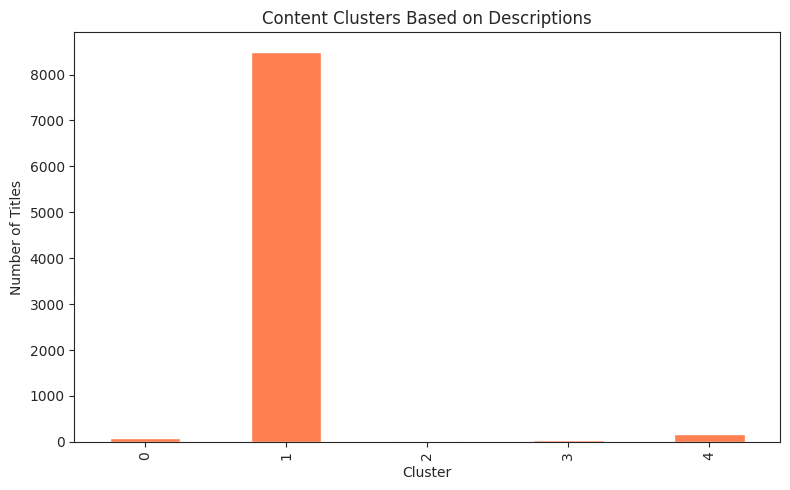


Top keywords per cluster:
Cluster 0: life, david, story, beginning, private, death, school, neto, plan, know
Cluster 1: man, world, christmas, movie, last, story, one, time, house, black
Cluster 2: rise, king, demon, beyblade, still, dance, high, black, chhota, bheem
Cluster 3: game, version, life, english, million, still, mind, short, comedy, end
Cluster 4: love, bangkok, story, fall, stories, money, song, secret, time, brother


In [ ]:
# Step 13: Machine Learning - Content Clustering based on Description

import nltk
import re
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Download necessary NLTK data
nltk.download('punkt')
nltk.download('stopwords')

# Define stopwords
stop_words = set(stopwords.words('english'))

# Clean text using regex tokenizer (safer than nltk.word_tokenize)
def clean_text(text):
    words = re.findall(r'\b[a-zA-Z]{2,}\b', str(text).lower())
    return ' '.join([w for w in words if w not in stop_words])

# --- Step (i): Identify correct text column ---
text_column = None
for option in ['description', 'overview', 'summary', 'info', 'details', 'title']:
    if option in df.columns:
        text_column = option
        break

if not text_column:
    raise KeyError("No suitable text column found for clustering.")

print(f"Using column '{text_column}' for clustering.\n")

# Step (ii): Clean descriptions
df['clean_desc'] = df[text_column].apply(clean_text)

# Step (iii): TF-IDF Vectorization
vectorizer = TfidfVectorizer(max_df=0.8, min_df=5)
X = vectorizer.fit_transform(df['clean_desc'])

# Step (iv): KMeans Clustering
kmeans = KMeans(n_clusters=5, random_state=42)
df['cluster'] = kmeans.fit_predict(X)

# Step (v): Visualize cluster sizes
plt.figure(figsize=(8, 5))
df['cluster'].value_counts().sort_index().plot(kind='bar', color='coral')
plt.xlabel('Cluster')
plt.ylabel('Number of Titles')
plt.title('Content Clusters Based on Descriptions')
plt.tight_layout()
plt.show()

# Step (vi): Show top keywords per cluster
terms = vectorizer.get_feature_names_out()
order_centroids = kmeans.cluster_centers_.argsort()[:, ::-1]

print("\nTop keywords per cluster:")
for i in range(5):
    top_terms = [terms[ind] for ind in order_centroids[i, :10]]
    print(f"Cluster {i}: {', '.join(top_terms)}")

    ##### THIS IS A WORK DONE BY 'SURENDRAN L